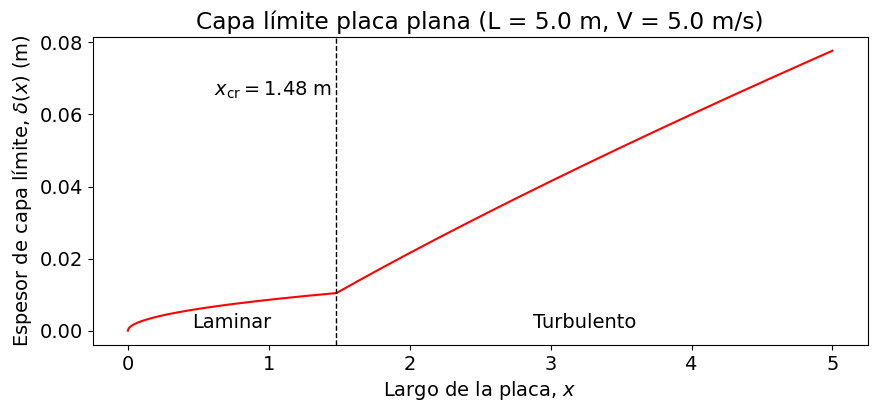

In [10]:
import numpy as np
import matplotlib.pyplot as plt

nu = 1.48E-5        # m2 /s (viscosidad cinemática del aire)
L = 5               # m     (largo de la placa)
V = 5               # m/s   (velocidad corriente libre)

Re = lambda x: x*V/nu # número de Reynolds

# Dominio para el gráfico
x = np.linspace(1E-5,L,1000)

# Determinamos el x crítico
Re_cr = 5E5
xcr = Re_cr*nu/V

# espesor de capa límite
delta_lam = lambda x: 5.0/Re(x)**(1/2)*x
delta_tur = lambda x: 0.38/Re(x)**(1/5)*x

# Formateamos el lienzo para graficar
fs0 = 14                         # tamaño de fuente (global)
fig, ax = plt.subplots()         # número de ejes en la figura
fig.set_size_inches(10, 4)       # tamaño de la figura
plt.rcParams['font.size'] = fs0  # tamaño de fuente

# graficamos
plt.plot(x,delta_lam(x)*(x <= xcr) + (delta_tur(x) - (delta_tur(xcr) - delta_lam(xcr)))*(x >= xcr),'-r')

# separar línea laminar de turbulenta
plt.axvline(x = xcr, color='k', ls='--', lw='1.0')
plt.text(xcr*0.98,plt.ylim()[1]*0.8,r'$x_\mathrm{cr} = %.2f$ m' % xcr, fontsize=fs0, horizontalalignment='right')
plt.text((x[0] + xcr) /2,plt.ylim()[1]*0.01,'Laminar', fontsize=fs0, horizontalalignment='center')
plt.text((xcr  + x[-1])/2,plt.ylim()[1]*0.01,'Turbulento', fontsize=fs0, horizontalalignment='center')

plt.title('Capa límite placa plana (L = %.1f m, V = %.1f m/s)' % (L, V))
plt.xlabel('Largo de la placa, $x$')
plt.ylabel('Espesor de capa límite, $\delta(x)$ (m)' )
plt.show()